In [ ]:
pip install opencv-python matplotlib

### Повышение резкости частотными фильтрами

#### Высокочастотная фильтрация фильтрами идеальным, Баттерворта, Гаусса  

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lib.frequency import gaussian_high_pass_filter
from lib.frequency import ideal_high_pass_filter
from lib.frequency import butterworth_high_pass_filter
from lib.frequency import spectrum

def apply_high_pass_filter(image, filter_func, *args, **kwargs):
    M, N = image.shape
    P, Q = 2*M, 2*N
    # Преобразование Фурье изображения с использованием NumPy
    fp = np.zeros((P, Q))
    fp[:M, :N] = image
    
    dft = np.fft.fft2(np.float32(fp))
    dft_shift = np.fft.fftshift(dft)

    # Создание маски фильтра
    H = filter_func(fp.shape, *args, **kwargs)

    # Применение маски
    fshift = dft_shift * H

    # Обратное преобразование Фурье
    f_ishift = np.fft.ifftshift(fshift)
    gp = np.fft.ifft2(f_ishift)
    gp = np.real(gp)
    gp = cv2.normalize(gp, None, 0, 255, cv2.NORM_MINMAX)
    
    g = gp[:M, :N]

    # Извлечение действительной части и нормализация
    # g = np.real(g)
    
    plt.figure(figsize=(14, 8))
    plt.subplot(241), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(242), plt.imshow(fp, cmap='gray'), plt.title('Extended Original Image')
    plt.subplot(244), plt.imshow(spectrum(dft_shift), cmap='gray'), plt.title('Spectrum Image')
    plt.subplot(243), plt.imshow(spectrum(H), cmap='gray'), plt.title('Filter H(u,v)')
    plt.subplot(248), plt.imshow(spectrum(fshift), cmap='gray'), plt.title('G Filtered Image')
    plt.subplot(245), plt.imshow(g, cmap='gray'), plt.title('After Inverse FFT')
    plt.subplot(246), plt.imshow(gp, cmap='gray'), plt.title('Extended After Inverse FFT Image')
    plt.show()

    return np.uint8(g)

# Загрузка изображения
image = cv2.imread('images/galaxy-black-hole.jpg', cv2.IMREAD_GRAYSCALE)

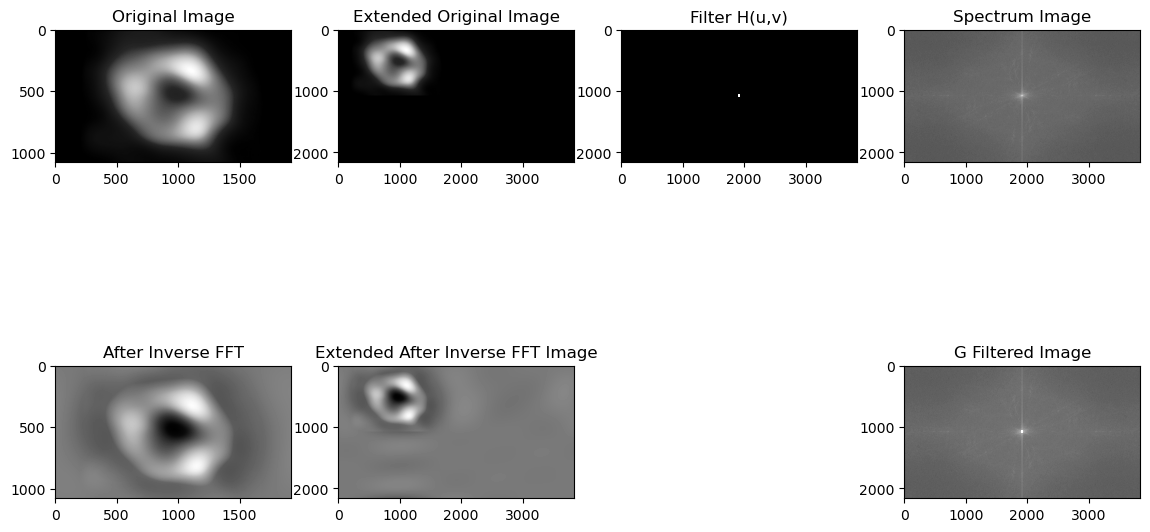

In [13]:
# Применение идеального высокочастотного фильтра
ideal_filtered_image = apply_high_pass_filter(image, ideal_high_pass_filter, 3)

Mask min: 0.009957332236190775, max: 1.0, mean: 0.9999810756626867


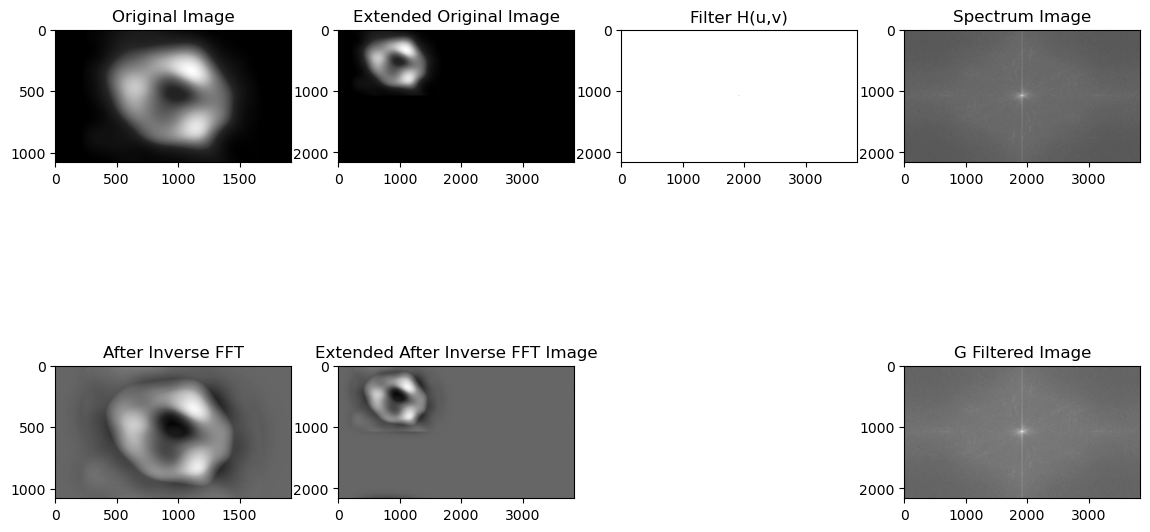

In [8]:
# Применение гауссовского высокочастотного фильтра
gaussian_filtered_image = apply_high_pass_filter(image, gaussian_high_pass_filter, 5)

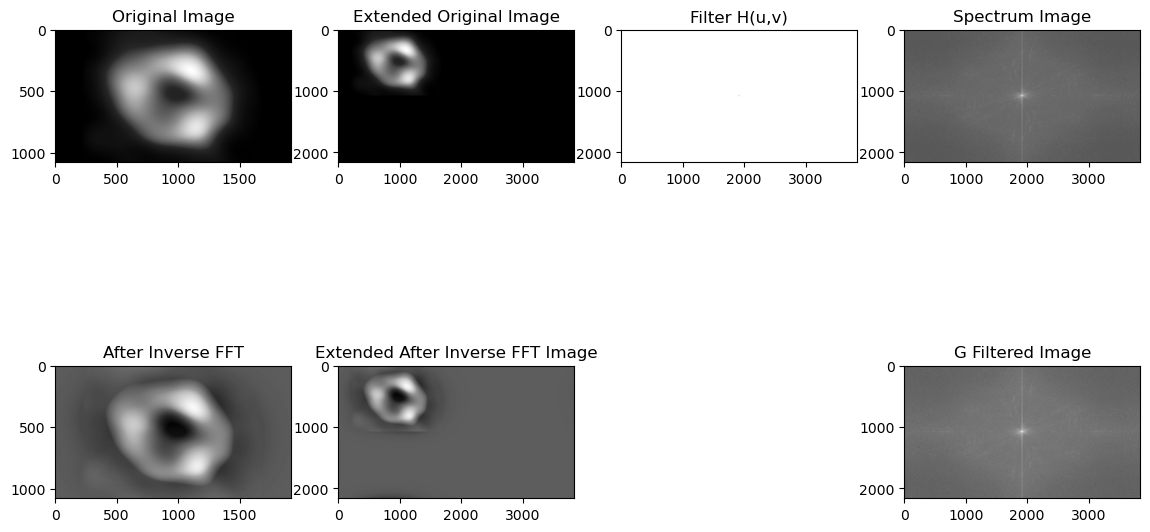

array([[92, 92, 92, ..., 92, 92, 92],
       [92, 92, 92, ..., 92, 92, 92],
       [92, 92, 92, ..., 92, 92, 92],
       ...,
       [92, 92, 92, ..., 92, 92, 92],
       [92, 92, 92, ..., 92, 92, 92],
       [92, 92, 92, ..., 92, 92, 92]], dtype=uint8)

In [5]:
# Применение гауссовского высокочастотного фильтра
apply_high_pass_filter(image, butterworth_high_pass_filter, 5, 1)

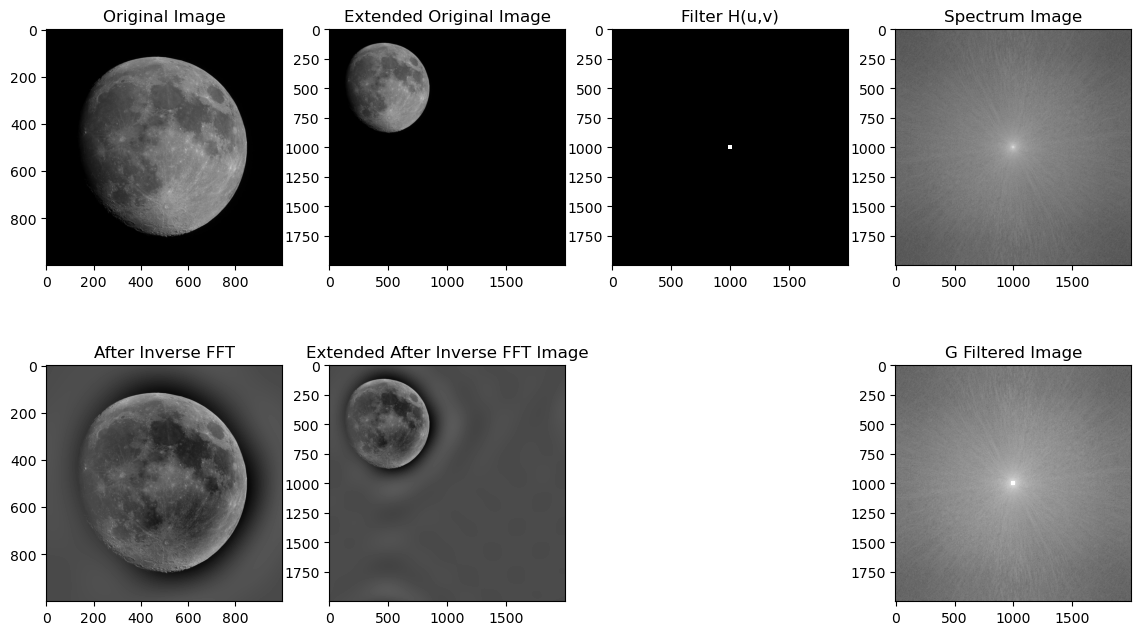

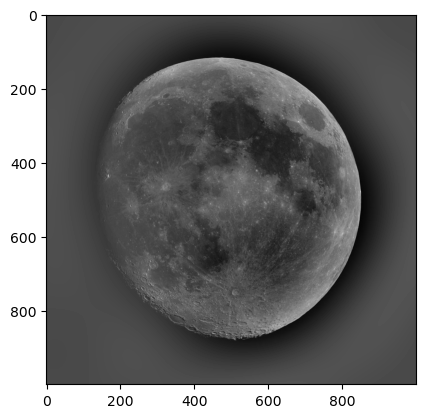

In [9]:
plt.imshow(apply_high_pass_filter(cv2.imread('images/moon.jpg', cv2.IMREAD_GRAYSCALE), ideal_high_pass_filter, 5), cmap='gray')

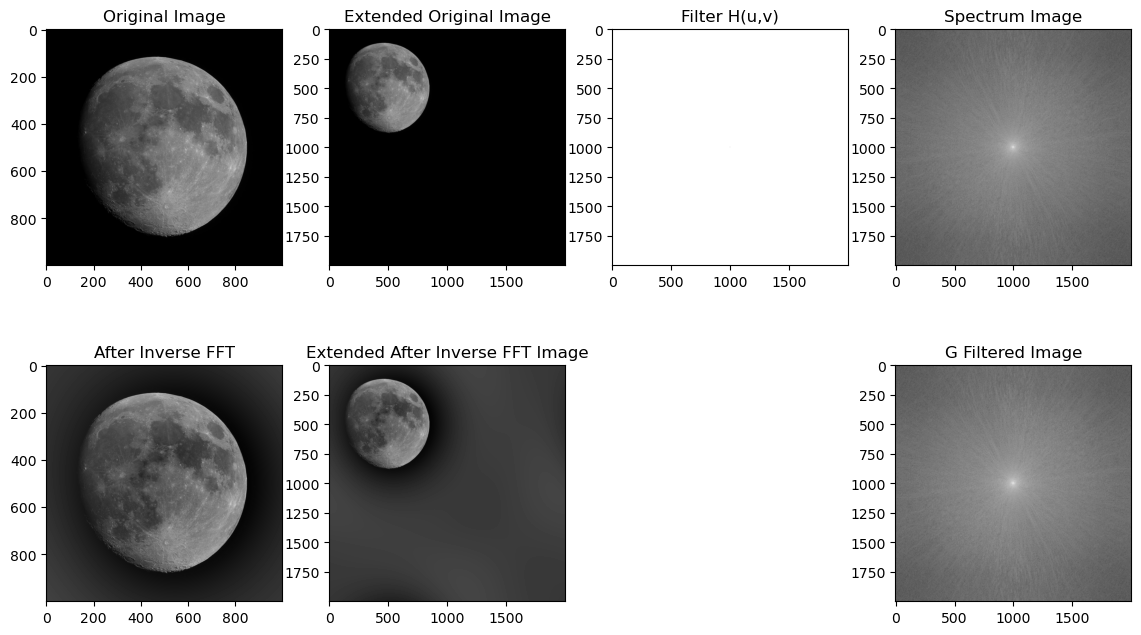

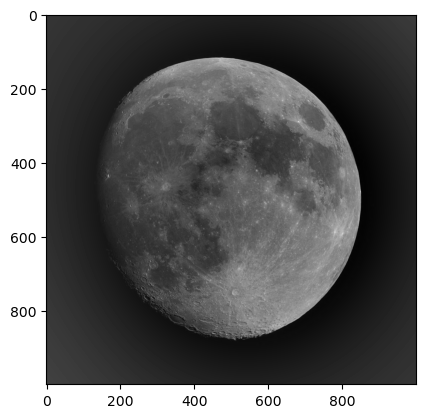

In [15]:
plt.imshow(apply_high_pass_filter(cv2.imread('images/moon.jpg', cv2.IMREAD_GRAYSCALE), butterworth_high_pass_filter, 2, 5), cmap='gray')

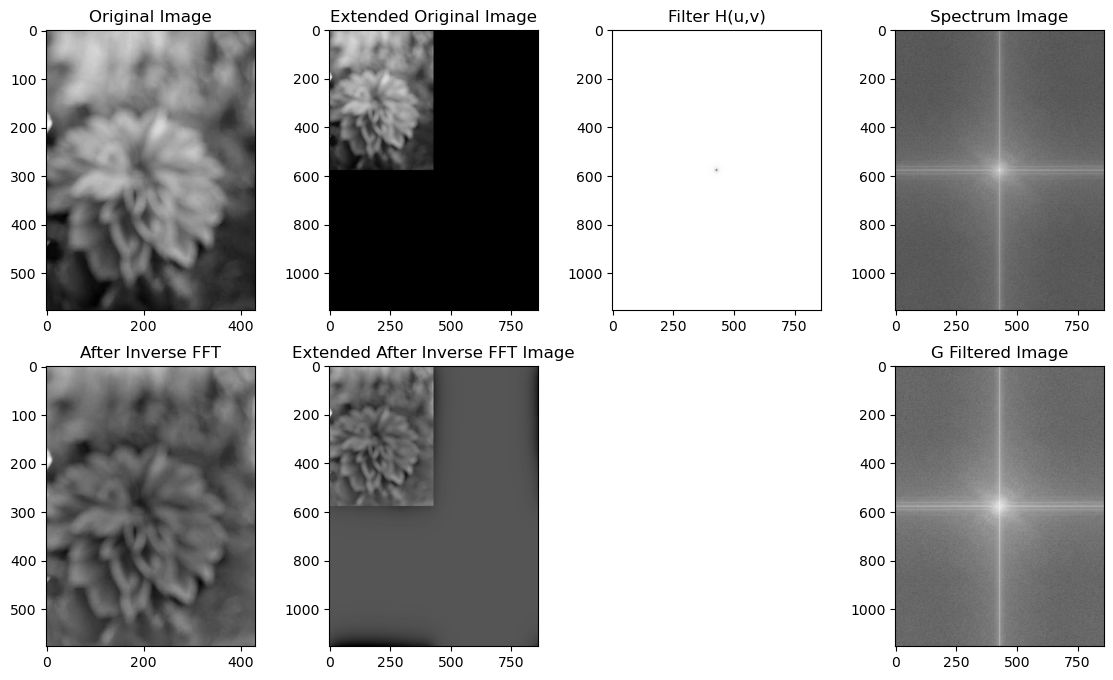

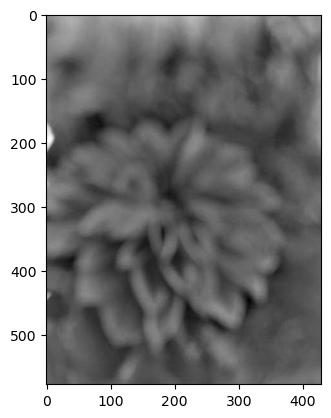

In [32]:
from lib.frequency import gaussian_high_pass_filter
galaxy_image = apply_high_pass_filter(cv2.imread('images/flowers-background.jpg', cv2.IMREAD_GRAYSCALE), butterworth_high_pass_filter, 5, 1)

plt.imshow(galaxy_image, cmap='gray')